In [1]:
import tensorflow as tf

In [31]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [32]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

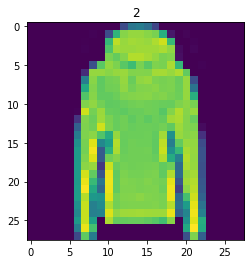

In [34]:
# visualizing the data
import matplotlib.pyplot as plt
import random 

n = random.randint(1, 60000)

plt.imshow(x_train[n])
plt.title(y_train[n])
plt.show()

In [35]:
# normalizing the data

x_train = x_train/255
x_test = x_test/255

In [36]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [37]:
# creating noise as the same dimension of the image
import numpy as np
noise = np.random.randn(*(28,28))

noise.shape

(28, 28)

In [38]:
# adding factor to the noise

factor = 0.2

noise_factor = factor * noise

noise_factor.shape

(28, 28)

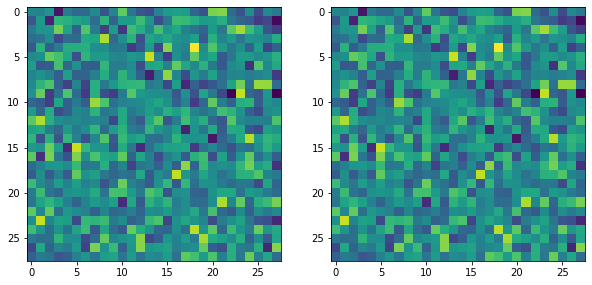

In [39]:
# visualizing the noise amd noise factor
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(noise)
plt.subplot(1,2,2)
plt.imshow(noise_factor)
plt.show()

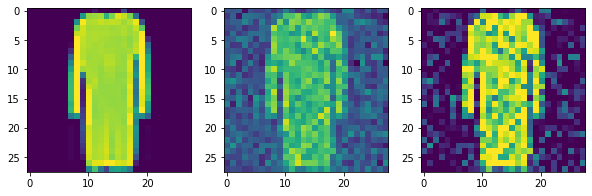

In [40]:
# visualizing the train data with noise
plt.figure(figsize=(10,12))
sample_image = x_train[25]
noise_sample_image = sample_image + factor * noise
noise_sample_image_clip = np.clip(noise_sample_image, 0.0,1.0)
plt.subplot(1,3,1)
plt.imshow(sample_image)
plt.subplot(1,3,2)
plt.imshow(noise_sample_image)
plt.subplot(1,3,3)
plt.imshow(noise_sample_image_clip)
plt.show()

In [41]:
# adding noise to the train data
import numpy as np
x_train_noise = []
factor = 0.2
noise = np.random.randn(*(28,28))

for image in x_train:
  noise_image = image + factor * noise
  noise_image = np.clip(noise_image, 0.0, 1.0)
  x_train_noise.append(noise_image)


In [42]:
x_train_noise = np.array(x_train_noise)

In [43]:
x_train_noise.shape

(60000, 28, 28)

In [44]:
# adding noise to the test data

x_test_noise = []
factor = 0.2
noise = np.random.randn(*(28,28))

for image in x_test:
  noise_image = image + factor * noise
  noise_image = np.clip(noise_image, 0.0,1.0)
  x_test_noise.append(noise_image)

In [45]:
x_test_noise = np.array(x_test_noise)

In [46]:
x_test_noise.shape

(10000, 28, 28)

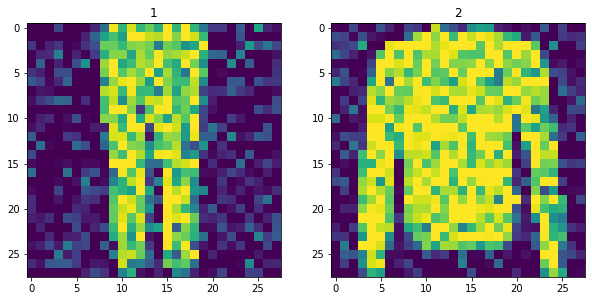

In [50]:
# visualizing the train and test data
import random

n = random.randint(1, 1000)

plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.imshow(x_train_noise[n])
plt.title(y_train[n])
plt.subplot(1,2,2)
plt.imshow(x_test_noise[n])
plt.title(y_test[n])
plt.show()






In [54]:
# buillding the autoencoder model
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
                             # encoding
                             layers.Conv2D(filters = 16, kernel_size= 3, strides =1, padding = "same", input_shape = (28,28,1)),
                             layers.MaxPool2D(pool_size= 2, padding="same"),
                             layers.Conv2D(filters = 8, kernel_size= 3, strides = 1, padding = "same"),
                             layers.MaxPool2D(pool_size= 2, padding = "same"),
                             layers.Conv2D(filters= 8, kernel_size= 3, padding = "same"),

                             # decoding

                             layers.UpSampling2D(size= 2),
                             layers.Conv2DTranspose(filters= 8, strides= 1 ,kernel_size= 3, padding = "same"),
                             layers.UpSampling2D(size= 2),
                             layers.Conv2DTranspose(filters = 1, kernel_size= 3, strides= 1, activation="sigmoid", padding = "same" )

])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 8)         5

In [56]:
# compiling the model

model.compile(
   loss = tf.keras.losses.binary_crossentropy,
   optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
   metrics = ["accuracy"]

)

In [57]:
# fitting the model

model.fit(
     x_train_noise.reshape(-1,28,28,1),
    x_train.reshape(-1,28,28,1),
    epochs = 10,
    batch_size = 200,
)

Epoch 1/10
300/300 [==============================] - 45s 148ms/step - loss: 0.3563 - accuracy: 0.5045
Epoch 2/10
300/300 [==============================] - 45s 148ms/step - loss: 0.3061 - accuracy: 0.5072
Epoch 3/10
300/300 [==============================] - 45s 149ms/step - loss: 0.3002 - accuracy: 0.5077
Epoch 4/10
300/300 [==============================] - 44s 148ms/step - loss: 0.2970 - accuracy: 0.5079
Epoch 5/10
300/300 [==============================] - 44s 148ms/step - loss: 0.2950 - accuracy: 0.5080
Epoch 6/10
300/300 [==============================] - 44s 148ms/step - loss: 0.2934 - accuracy: 0.5081
Epoch 7/10
300/300 [==============================] - 44s 148ms/step - loss: 0.2922 - accuracy: 0.5082
Epoch 8/10
300/300 [==============================] - 44s 148ms/step - loss: 0.2911 - accuracy: 0.5083
Epoch 9/10
300/300 [==============================] - 44s 148ms/step - loss: 0.2902 - accuracy: 0.5084
Epoch 10/10
300/300 [==============================] - 44s 148ms/step - l

In [58]:
# model prediction

model_image_prediction = model.predict(x_test_noise[:10].reshape(-1,28,28,1))

In [59]:
model_image_prediction.shape

(10, 28, 28, 1)

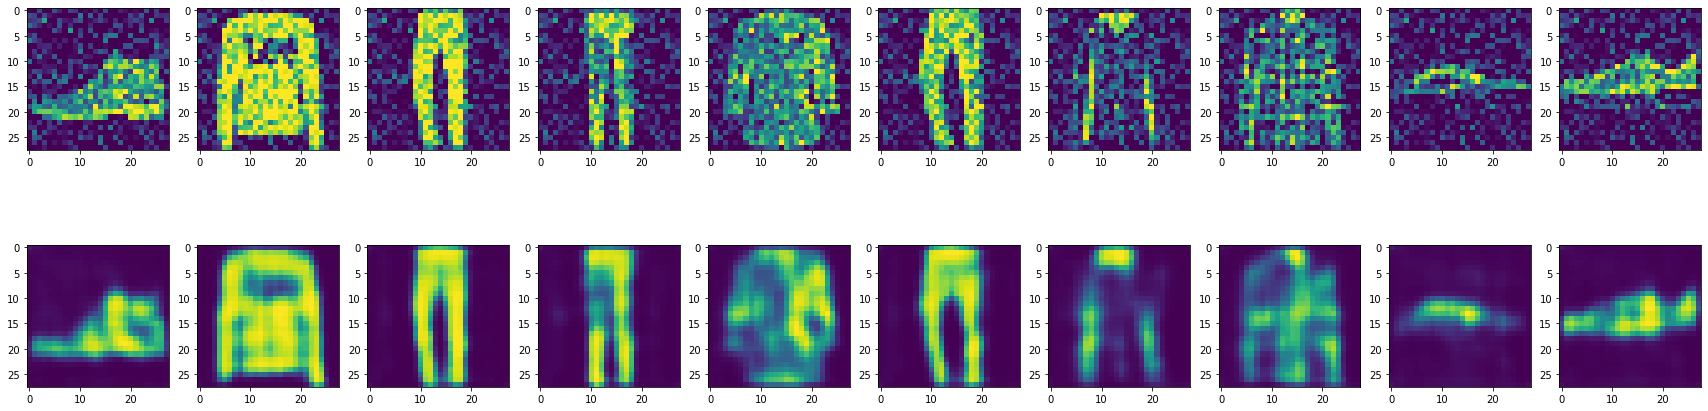

In [61]:
# visualizing the result

fig, axes = plt.subplots(nrows = 2, ncols = 10, figsize = (30,8))

for images, row in zip([x_test_noise[:10], model_image_prediction], axes):
  for img, ax in zip(images,row):
    ax.imshow(img.reshape((28,28)))